# Описание задачи
Определить регион, где проживает человек, отвечавший на вопросы анкеты. Анкетирование проводилось в рамках исследования о том, что люди считают Средним Западом США.
В анкете содержались следующие пункты:

*   Пол
*   Возраст
*   Доход
*   Образование
*   Почтовый индекс
*   Как вы называете тот регион, в котором живёте
*   На сколько по 4-балльной шкале вы считаете себя жителем Среднего Запада
*   20 вопросов вроде "Считаете ли вы, что *Имя штата* принадлежит Среднему Западу

Задача: определить, в каком официальном регионе США проживает респондент.




In [65]:
# 1. Считывание данных
from sklearn.datasets import fetch_openml

# Загружаем данные из https://www.openml.org/d/42768
X, y = fetch_openml(data_id=42768, as_frame = True, return_X_y=True, target_column=None)

In [66]:
# 2. Визуализация данных, основные характеристики
X.describe()

,What_would_you_call_the_part_of_the_country_you_live_in_now,How_much_do_you_personally_identify_as_a_Midwesterner,Do_you_consider_Illinois_state_as_part_of_the_Midwest,Do_you_consider_Indiana_state_as_part_of_the_Midwest,Do_you_consider_Iowa_state_as_part_of_the_Midwest,Do_you_consider_Kansas_state_as_part_of_the_Midwest,Do_you_consider_Michigan_state_as_part_of_the_Midwest,Do_you_consider_Minnesota_state_as_part_of_the_Midwest,Do_you_consider_Missouri_state_as_part_of_the_Midwest,Do_you_consider_Nebraska_state_as_part_of_the_Midwest,...,Do_you_consider_Pennsylvania_state_as_part_of_the_Midwest,Do_you_consider_West_Virginia_state_as_part_of_the_Midwest,Do_you_consider_Montana_state_as_part_of_the_Midwest,Do_you_consider_Wyoming_state_as_part_of_the_Midwest,Gender,Age,Household_Income,Education,In_what_ZIP_code_is_your_home_located,Census_Region
count,2777,2778,2778,2778,2778,2778,2778,2778,2778,2778,...,2778,2778,2778,2778,2503,2503,2435,2473,2524,2494
unique,1008,4,2,2,2,2,2,2,2,2,...,2,2,2,2,2,4,5,5,2096,9
top,Midwest,Not at all,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,No,No,No,Female,45-60,"$50,000 - $99,999",Associate or bachelor degree,60202,East North Central
freq,487,1075,1954,1825,1986,1622,1427,1500,1522,1582,...,2658,2664,2313,2255,1330,705,721,811,5,758


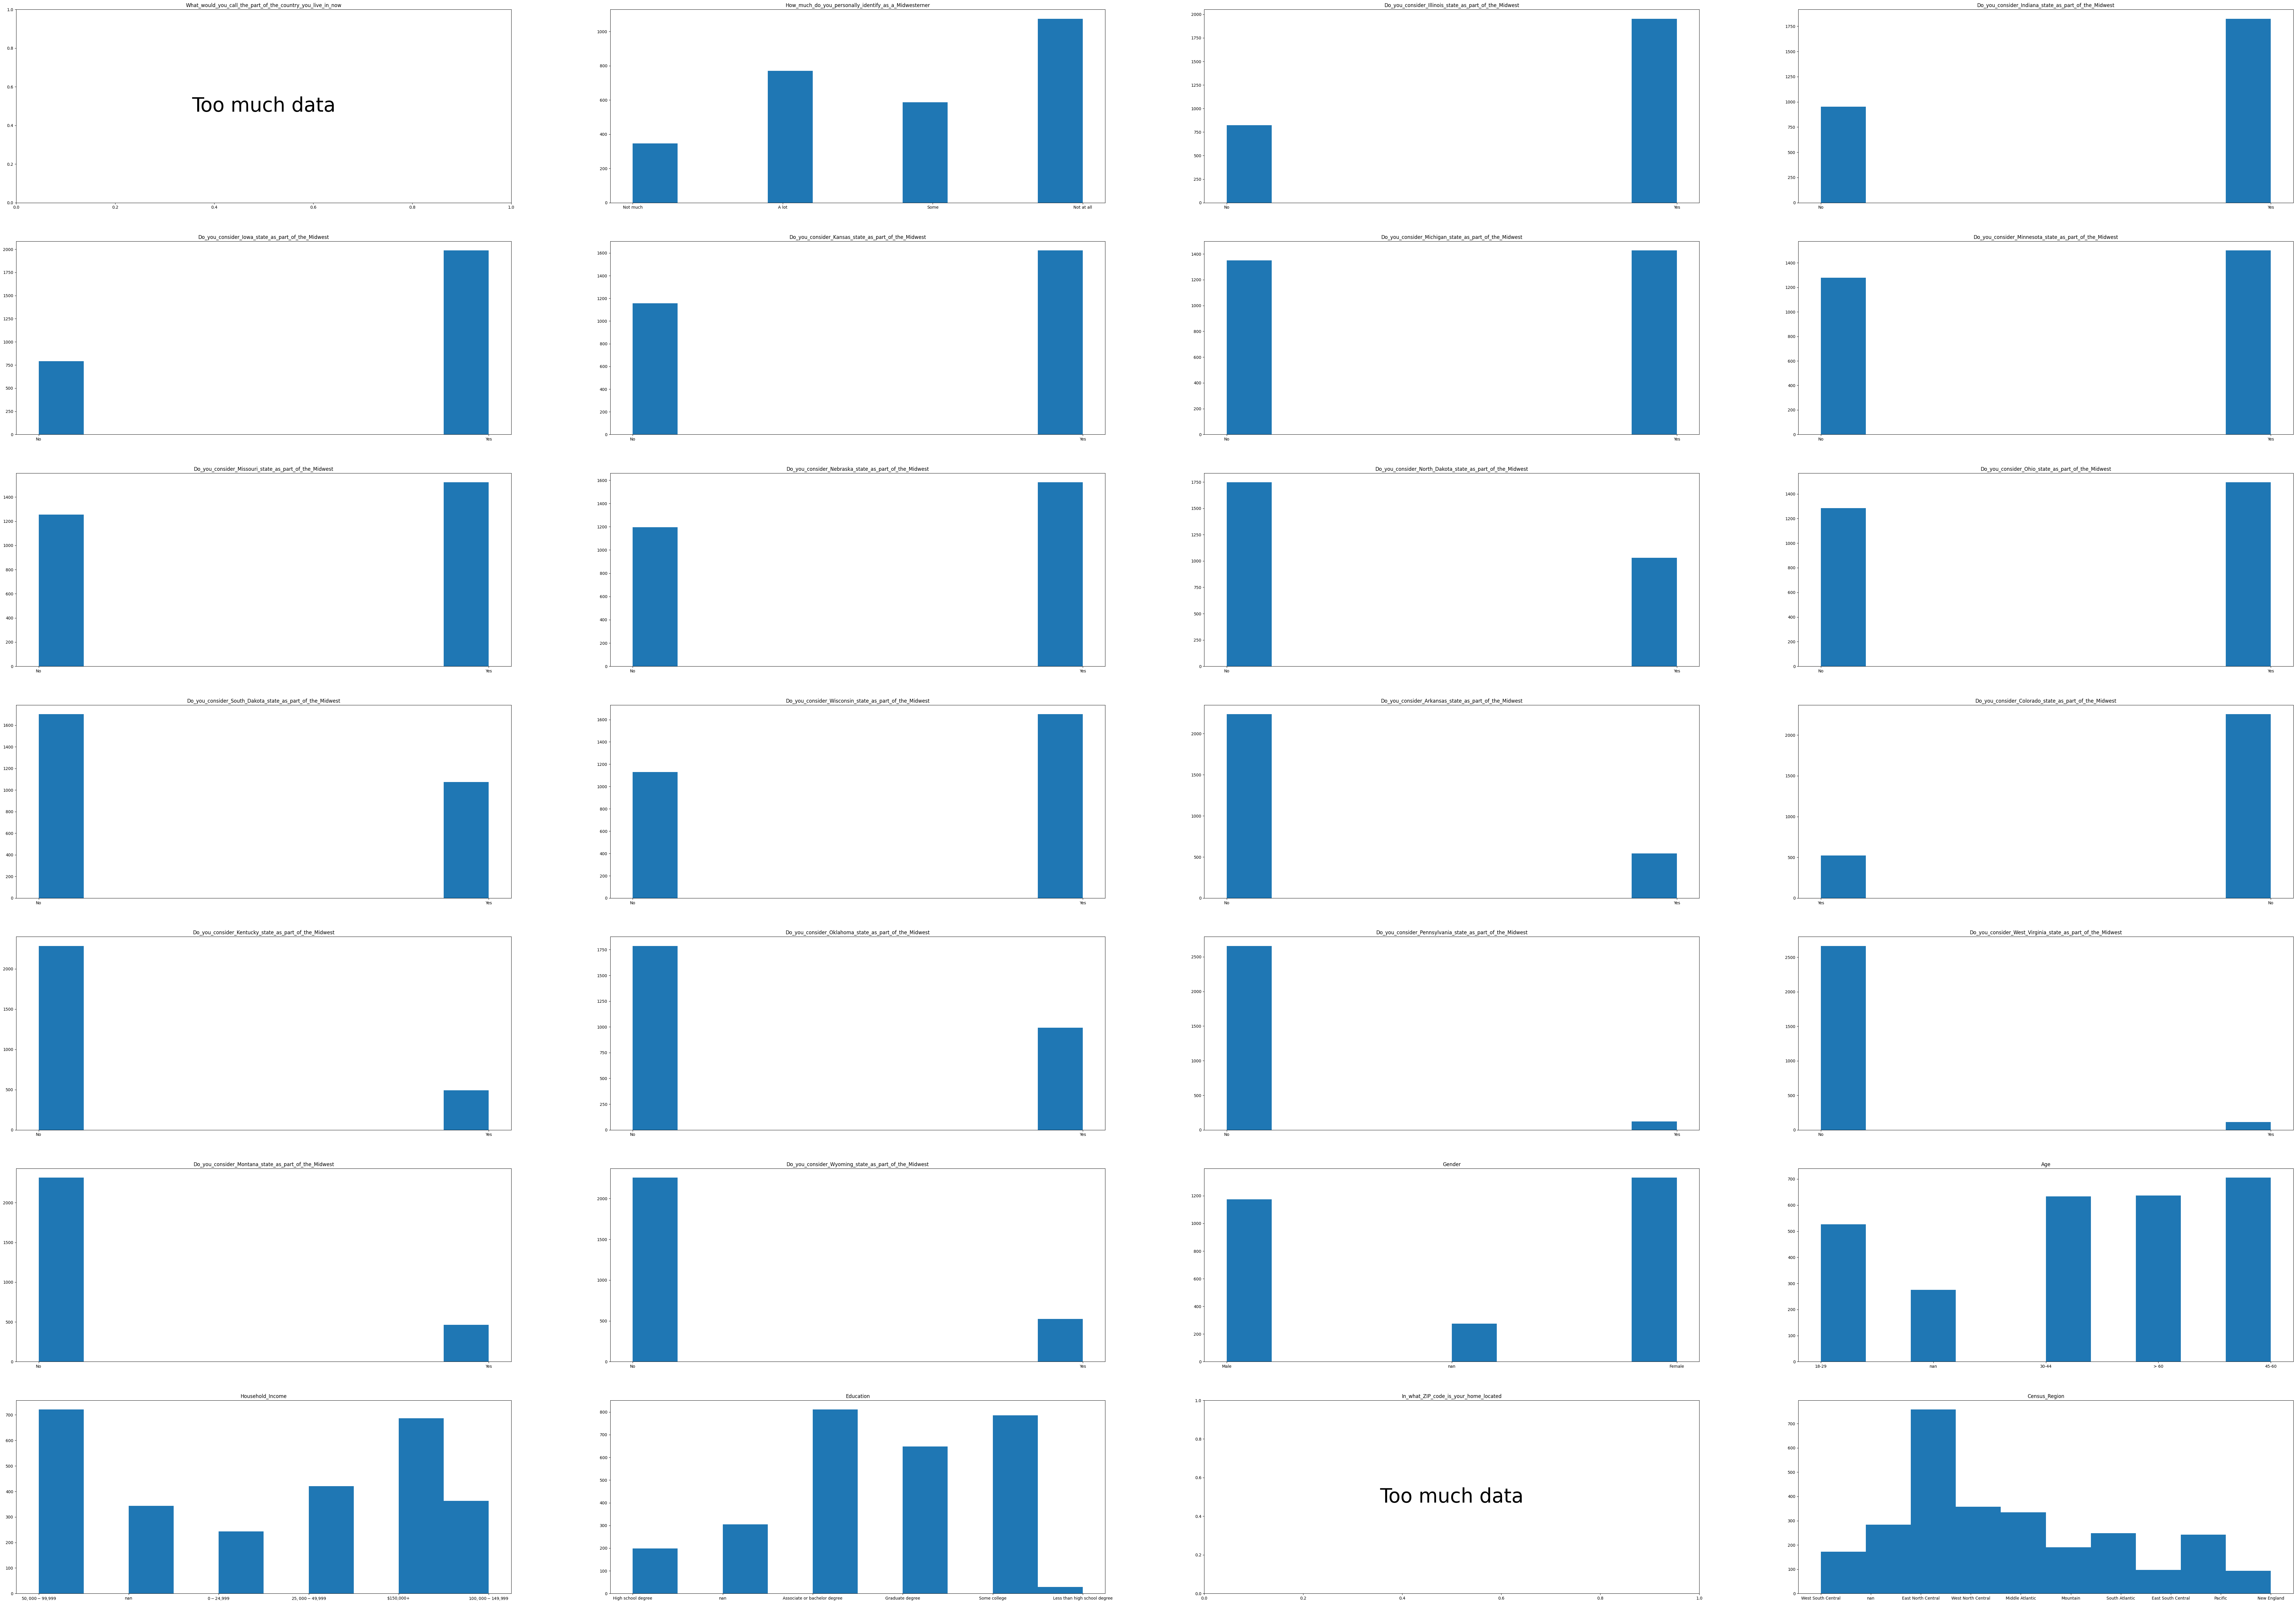

In [67]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots(7, 4, figsize=(100, 70))
for i in range(7):
  for j in range(4):
    title = X.keys()[i*4+j]
    data = X[title]
    axes[i][j].set_title(title)

    if (len(data.astype('category').cat.categories) > 20):
      axes[i][j].text(0.5, 0.5, 'Too much data', fontsize = 48, ha='center', va='center')
    else:
      axes[i][j].hist(list(data))
plt.show()

In [68]:
# 3. Обработка пропущенных значений
categories_with_na = ['Household_Income', 'Education', 'Age', 'Gender', 'In_what_ZIP_code_is_your_home_located', 'Census_Region']
for category in categories_with_na:
  X.fillna({category: X[category].mode().iloc[0]}, inplace=True)


In [69]:
# 4. Обработка категориальных признаков
import pandas as pd

for category in X.keys():
  if category == 'In_what_ZIP_code_is_your_home_located' or category == 'What_would_you_call_the_part_of_the_country_you_live_in_now':
    continue
  X[category] = pd.factorize(X[category])[0]

In [70]:
# 5. Нормализации не будет, данные категориальные или текстовые

In [71]:
# 6. Разбиение данных на обучающую и тестовую выборки
N_test = int(X.shape[0]*0.8)
N_train = X.shape[0] - N_test
y = X['Census_Region']
X = X.drop(['What_would_you_call_the_part_of_the_country_you_live_in_now', 'In_what_ZIP_code_is_your_home_located'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = N_train, test_size = N_test, random_state=1)

Ошибки на обучающей и тестовой выборке:  0.5 0.5391539153915391


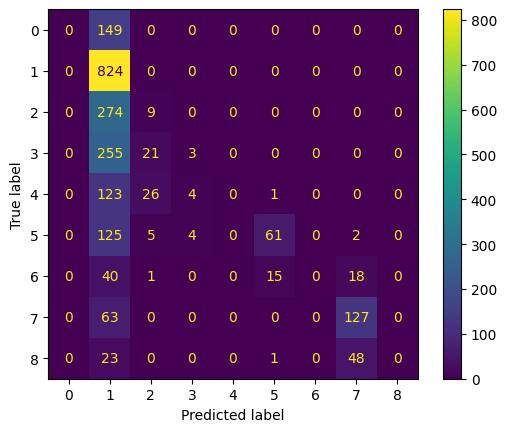

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.44      1.00      0.61       824
           2       0.15      0.03      0.05       283
           3       0.27      0.01      0.02       279
           4       0.00      0.00      0.00       154
           5       0.78      0.31      0.44       197
           6       0.00      0.00      0.00        74
           7       0.65      0.67      0.66       190
           8       0.00      0.00      0.00        72

    accuracy                           0.46      2222
   macro avg       0.25      0.22      0.20      2222
weighted avg       0.34      0.46      0.33      2222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# 7. Запуск самого простого классификатора ближайших соседей
# Обучаем классификатор kNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=200, p=1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки на обучающей и тестовой выборке
import numpy as np
print("Ошибки на обучающей и тестовой выборке: ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


In [73]:
# 8. Подбор оптимального значения к-ва ближайших соседей
n_neighbors = np.arange(1,100)
for i in range(100, 550, 50):
  n_neighbors = np.append(n_neighbors, i)
test_err = []
train_err = []
for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n, p=1)
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_err.append(np.mean(y_train != y_train_pred))
  test_err.append(np.mean(y_test != y_test_pred))

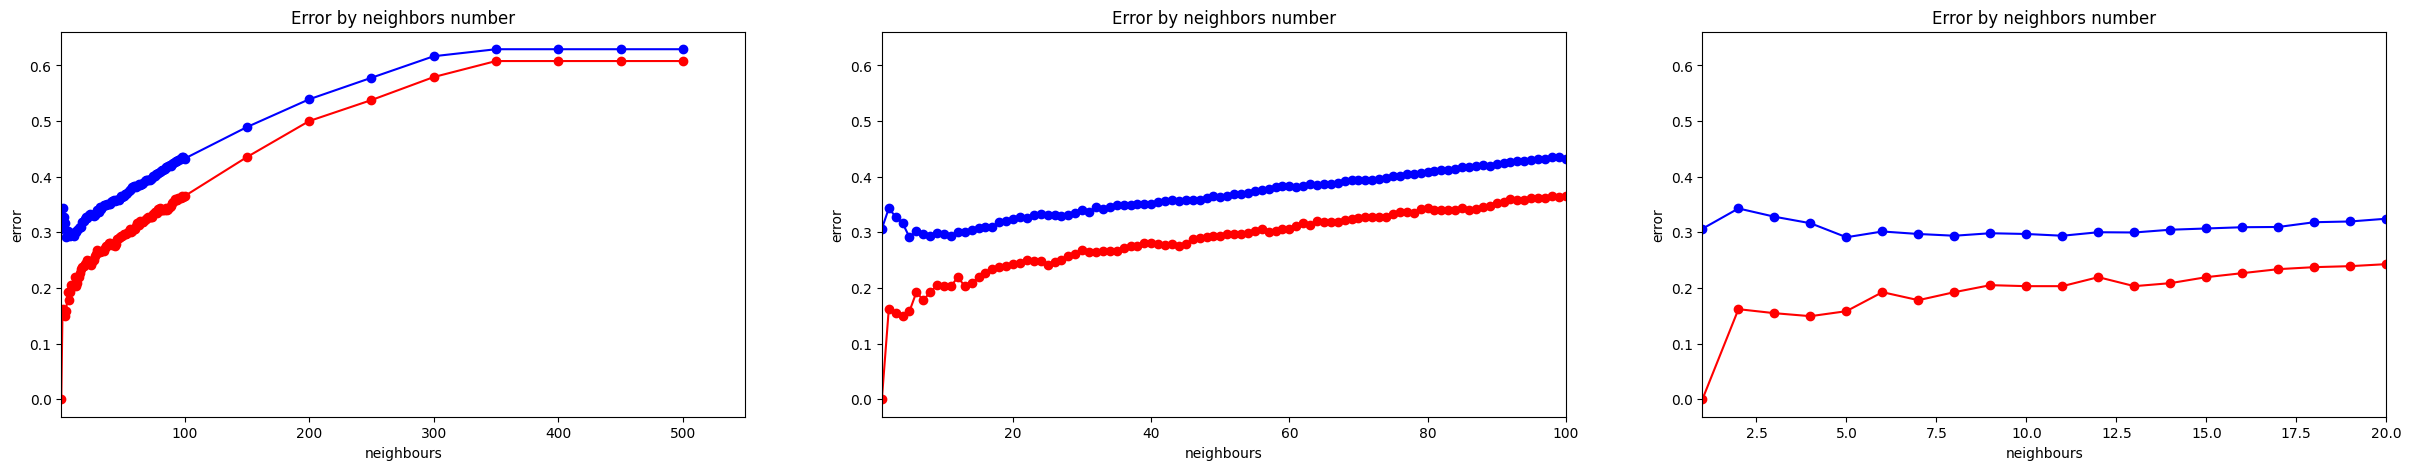

Минимальные ошибки на обучающей и тестовой выборке: 0.0 0.2911791179117912
Оптимальное число соседей для минимизации ошибки на тестовой выборке: [5]


In [74]:
import matplotlib.pyplot as plt
fig, a = plt.subplots(1, 3, figsize=(30, 5))
for i, size in enumerate(([[1, 550], [1, 100], [1,20]])):
  a[i].plot(n_neighbors, train_err, 'r-o', label = 'train')
  a[i].plot(n_neighbors, test_err, 'b-o', label = 'test')
  a[i].set_title('Error by neighbors number')
  a[i].set_xlabel('neighbours')
  a[i].set_ylabel('error')
  # a[i].legend()
  a[i].set_xlim(size)
plt.show()

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальные ошибки на обучающей и тестовой выборке:", min_train_err, min_test_err)
k_opt = n_neighbors[test_err == min_test_err]
print("Оптимальное число соседей для минимизации ошибки на тестовой выборке:", k_opt)

Ошибки на обучающей и тестовой выборке (5 соседей):  0.15827338129496402 0.2911791179117912


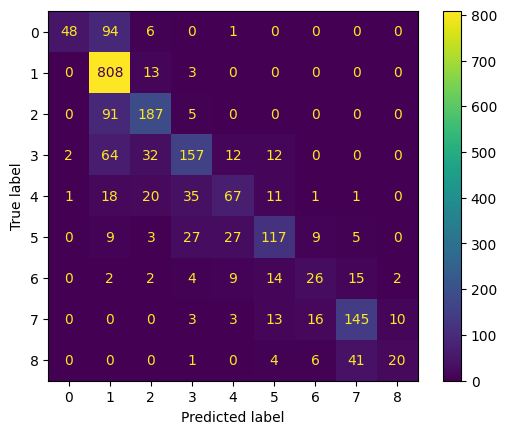

              precision    recall  f1-score   support

           0       0.94      0.32      0.48       149
           1       0.74      0.98      0.85       824
           2       0.71      0.66      0.68       283
           3       0.67      0.56      0.61       279
           4       0.56      0.44      0.49       154
           5       0.68      0.59      0.64       197
           6       0.45      0.35      0.39        74
           7       0.70      0.76      0.73       190
           8       0.62      0.28      0.38        72

    accuracy                           0.71      2222
   macro avg       0.68      0.55      0.58      2222
weighted avg       0.71      0.71      0.69      2222



In [75]:
# 9. Ошибки на обучающей и тестовой выборках при оптимальном k
model = KNeighborsClassifier(n_neighbors=k_opt[0], p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Ошибки на обучающей и тестовой выборке (5 соседей): ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


Ошибки на обучающей и тестовой выборке:  0.0 0.0027002700270027003


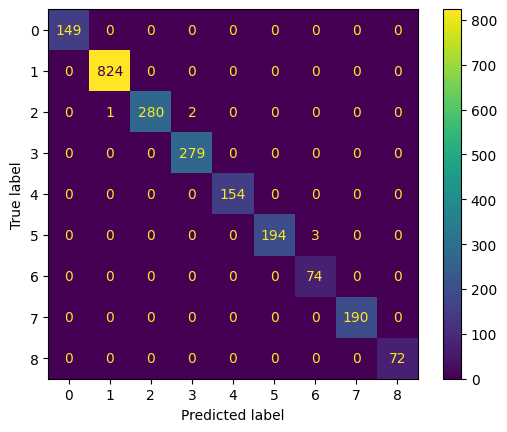

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       824
           2       1.00      0.99      0.99       283
           3       0.99      1.00      1.00       279
           4       1.00      1.00      1.00       154
           5       1.00      0.98      0.99       197
           6       0.96      1.00      0.98        74
           7       1.00      1.00      1.00       190
           8       1.00      1.00      1.00        72

    accuracy                           1.00      2222
   macro avg       0.99      1.00      1.00      2222
weighted avg       1.00      1.00      1.00      2222



In [76]:
# 10. Запуск других классификаторов с подбором параметров.
# Обучаем Наивный Байесовский классификатор
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Проверяем качество классификатора
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки на обучающей и тестовой выборке
import numpy as np
print("Ошибки на обучающей и тестовой выборке: ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Ошибки на обучающей и тестовой выборке:  0.030575539568345324 0.0999099909990999


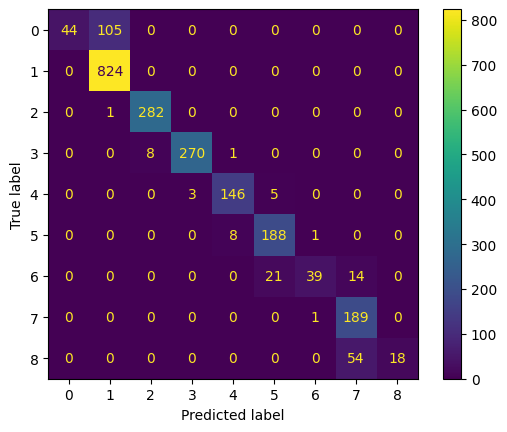

              precision    recall  f1-score   support

           0       1.00      0.30      0.46       149
           1       0.89      1.00      0.94       824
           2       0.97      1.00      0.98       283
           3       0.99      0.97      0.98       279
           4       0.94      0.95      0.94       154
           5       0.88      0.95      0.91       197
           6       0.95      0.53      0.68        74
           7       0.74      0.99      0.85       190
           8       1.00      0.25      0.40        72

    accuracy                           0.90      2222
   macro avg       0.93      0.77      0.79      2222
weighted avg       0.91      0.90      0.88      2222



In [77]:
# Метод опорных векторов
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)

# Проверяем качество классификатора
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки на обучающей и тестовой выборке
import numpy as np
print("Ошибки на обучающей и тестовой выборке: ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Лучшее C и gamma:  10.0 0.01
Ошибки на обучающей и тестовой выборке (с оптимальными параметрами C и gamma):  0.0 0.0


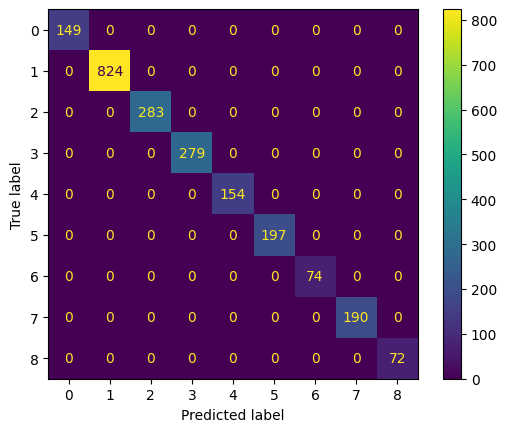

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       824
           2       1.00      1.00      1.00       283
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       154
           5       1.00      1.00      1.00       197
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00       190
           8       1.00      1.00      1.00        72

    accuracy                           1.00      2222
   macro avg       1.00      1.00      1.00      2222
weighted avg       1.00      1.00      1.00      2222



In [78]:
# Подбор оптимальных параметров
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print("Лучшее C и gamma: ", grid.best_estimator_.C, grid.best_estimator_.gamma)

from sklearn.svm import SVC
model = SVC(gamma=grid.best_estimator_.gamma, C=grid.best_estimator_.C)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

import numpy as np
print("Ошибки на обучающей и тестовой выборке (с оптимальными параметрами C и gamma): ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Ошибки на обучающей и тестовой выборке:  0.0 0.20432043204320433


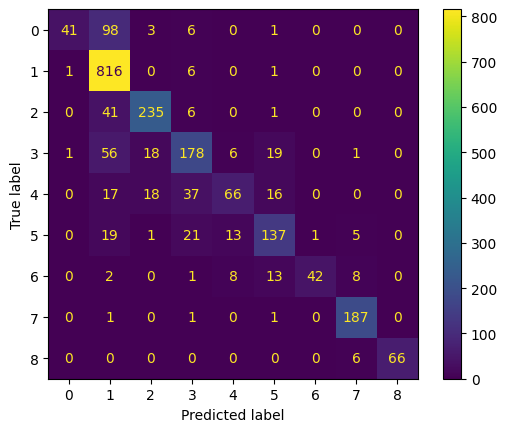

              precision    recall  f1-score   support

           0       0.95      0.28      0.43       149
           1       0.78      0.99      0.87       824
           2       0.85      0.83      0.84       283
           3       0.70      0.64      0.67       279
           4       0.71      0.43      0.53       154
           5       0.72      0.70      0.71       197
           6       0.98      0.57      0.72        74
           7       0.90      0.98      0.94       190
           8       1.00      0.92      0.96        72

    accuracy                           0.80      2222
   macro avg       0.84      0.70      0.74      2222
weighted avg       0.80      0.80      0.78      2222



In [79]:
# 11. Решение задачи несбалансированности классов путём получения весов классов
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Создание модели рандомного леса с взвешиванием классов
model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки на обучающей и тестовой выборке
import numpy as np
print("Ошибки на обучающей и тестовой выборке: ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

[[ 1.   -0.13 -0.06 -0.03  0.12 -0.14 -0.09  0.    0.11  0.02 -0.09  0.04 -0.12  0.07 -0.1  -0.02  0.14 -0.03 -0.06  0.13  0.13 -0.   -0.03  0.03  0.01  0.31]
 [-0.13  1.    0.6   0.34 -0.03  0.5   0.32  0.21 -0.06 -0.05  0.47 -0.08  0.44 -0.05  0.35  0.12 -0.17  0.07  0.04 -0.26 -0.33 -0.06  0.02  0.03 -0.02 -0.11]
 [-0.06  0.6   1.    0.29  0.    0.46  0.24  0.22 -0.04 -0.07  0.55 -0.11  0.37 -0.02  0.3   0.2  -0.11  0.11  0.08 -0.2  -0.25 -0.05  0.03  0.03 -0.01 -0.04]
 [-0.03  0.34  0.29  1.    0.24  0.2   0.32  0.32  0.27  0.18  0.17  0.18  0.3   0.07  0.16  0.02  0.07 -0.06 -0.04 -0.06 -0.09 -0.04  0.05  0.06 -0.01  0.  ]
 [ 0.12 -0.03  0.    0.24  1.   -0.15  0.01  0.41  0.55  0.23 -0.08  0.26 -0.1   0.31 -0.15  0.07  0.44 -0.08  0.    0.08  0.16 -0.02  0.02  0.04  0.01  0.17]
 [-0.14  0.5   0.46  0.2  -0.15  1.    0.46  0.07 -0.14  0.03  0.49 -0.02  0.56 -0.11  0.26  0.07 -0.22  0.14  0.07 -0.17 -0.23 -0.06  0.03  0.04 -0.03 -0.11]
 [-0.09  0.32  0.24  0.32  0.01  0.46  1.    0

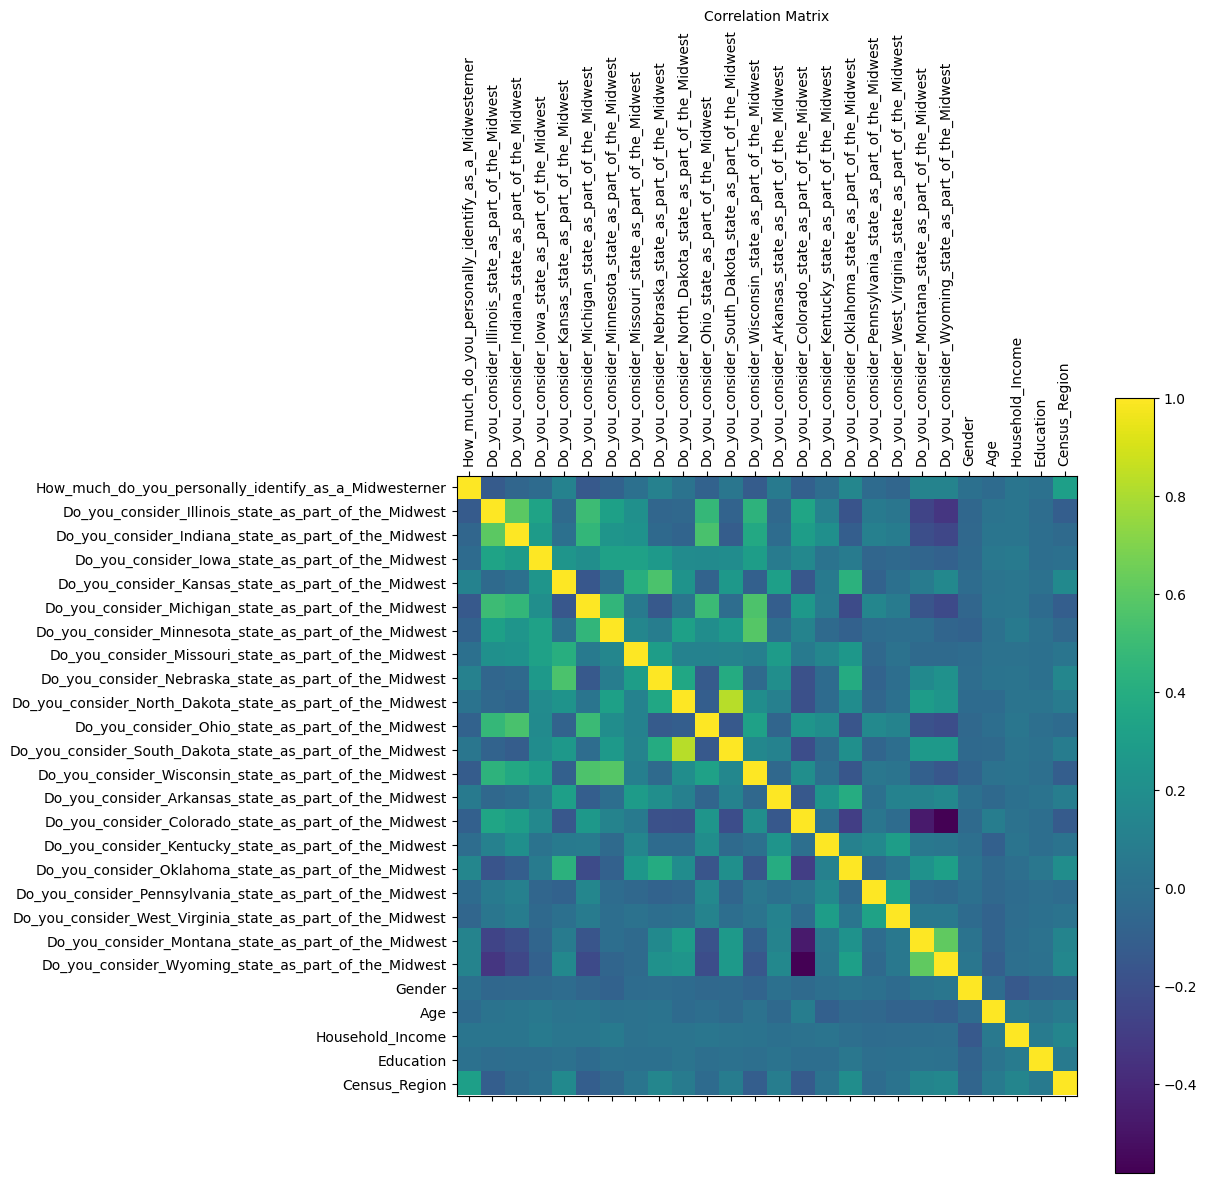

In [80]:
# 12. Исключение коррелированных переменных
import numpy as np
corr_m = np.corrcoef(X, rowvar=False)
np.set_printoptions(linewidth=28*15, precision=2, suppress=True)
print(corr_m)

f = plt.figure(figsize=(10, 10))
plt.matshow(corr_m, fignum=f.number)
plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()

In [81]:
# Удалем одну из коррелированных переменных
features_to_drop = []
for i in range(len(X.keys())):
  for j in range(i+1,len(X.keys())):
    if abs(corr_m[i][j]) >= 0.5:
      features_to_drop.append(X.keys()[j])
      print(f"{X.keys()[i]} и {X.keys()[j]} коррелированы, коэф. корреляции {corr_m[i][j]}")

X = X.drop(features_to_drop, axis=1)
X.describe()

Do_you_consider_Illinois_state_as_part_of_the_Midwest и Do_you_consider_Indiana_state_as_part_of_the_Midwest коррелированы, коэф. корреляции 0.5998271436090722
Do_you_consider_Illinois_state_as_part_of_the_Midwest и Do_you_consider_Michigan_state_as_part_of_the_Midwest коррелированы, коэф. корреляции 0.5002621494707215
Do_you_consider_Indiana_state_as_part_of_the_Midwest и Do_you_consider_Ohio_state_as_part_of_the_Midwest коррелированы, коэф. корреляции 0.5467895769338208
Do_you_consider_Kansas_state_as_part_of_the_Midwest и Do_you_consider_Nebraska_state_as_part_of_the_Midwest коррелированы, коэф. корреляции 0.5535438716828853
Do_you_consider_Michigan_state_as_part_of_the_Midwest и Do_you_consider_Wisconsin_state_as_part_of_the_Midwest коррелированы, коэф. корреляции 0.5600597825613892
Do_you_consider_Minnesota_state_as_part_of_the_Midwest и Do_you_consider_Wisconsin_state_as_part_of_the_Midwest коррелированы, коэф. корреляции 0.5817447847133589
Do_you_consider_North_Dakota_state_as_p

,How_much_do_you_personally_identify_as_a_Midwesterner,Do_you_consider_Illinois_state_as_part_of_the_Midwest,Do_you_consider_Iowa_state_as_part_of_the_Midwest,Do_you_consider_Kansas_state_as_part_of_the_Midwest,Do_you_consider_Minnesota_state_as_part_of_the_Midwest,Do_you_consider_Missouri_state_as_part_of_the_Midwest,Do_you_consider_North_Dakota_state_as_part_of_the_Midwest,Do_you_consider_Arkansas_state_as_part_of_the_Midwest,Do_you_consider_Colorado_state_as_part_of_the_Midwest,Do_you_consider_Kentucky_state_as_part_of_the_Midwest,Do_you_consider_Oklahoma_state_as_part_of_the_Midwest,Do_you_consider_Pennsylvania_state_as_part_of_the_Midwest,Do_you_consider_West_Virginia_state_as_part_of_the_Midwest,Do_you_consider_Montana_state_as_part_of_the_Midwest,Gender,Age,Household_Income,Education,Census_Region
count,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000
mean,1.860691,0.703384,0.714903,0.583873,0.539957,0.547876,0.371130,0.195104,0.812455,0.177466,0.357091,0.043197,0.041037,0.167387,0.577754,1.497120,1.655148,1.758819,2.805976
std,1.069276,0.456848,0.451542,0.493004,0.498491,0.497792,0.483194,0.396352,0.390419,0.382131,0.479228,0.203336,0.198411,0.373388,0.494006,1.043262,1.507111,0.977310,2.266255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,4.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,8.000000


Ошибки на обучающей и тестовой выборке:  0.15827338129496402 0.2911791179117912


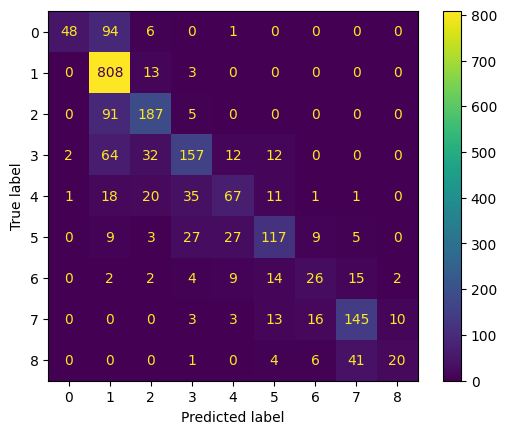

              precision    recall  f1-score   support

           0       0.94      0.32      0.48       149
           1       0.74      0.98      0.85       824
           2       0.71      0.66      0.68       283
           3       0.67      0.56      0.61       279
           4       0.56      0.44      0.49       154
           5       0.68      0.59      0.64       197
           6       0.45      0.35      0.39        74
           7       0.70      0.76      0.73       190
           8       0.62      0.28      0.38        72

    accuracy                           0.71      2222
   macro avg       0.68      0.55      0.58      2222
weighted avg       0.71      0.71      0.69      2222



In [82]:
# Попробуем обучить на этих данных kNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки на обучающей и тестовой выборке
import numpy as np
print("Ошибки на обучающей и тестовой выборке: ", np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

# Матрица рассогласования
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Другие метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

# Вывод

Различные классификаторы показали себя по-разному. Топ классификаторов по ошибке на тестовой выборке:

1.   метод опорных векторов с оптимальными параметрами (ошибка 0%)
2.   наивный байесовский классификатор (ошибка 0.3%)
3.   метод опорных векторов (ошибка 9%)
4.   knn оптимальные 5 соседей  (ошибка 20%)
5.   рандомный лес с взвешенными классами (ошибка 20%)
6.   knn оптимальные 5 соседей без коррелированных переменных (ошибка 29%)
7.   knn 200 соседей (ошибка целых 54%)

В целом, как будто бы дополнительная очистка данных и борьба с несбалансированными классами не очень помогли в обучении моделей.

Я проведу ещё раз эту же работу над более интересными данными, желательно с количественными признаками.

Также хочется отметить, что у меня не получилось "пристроить" в модель текстовые признаки *Как вы называете место в котором живёте* и *Почтовый индекс вашего места проживания*. Возможно, с ними алгоритмы бы хуже справились.

